In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
from time import time

In [2]:
sales = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
items_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

In [3]:
test = pd.read_csv('test.csv')
sim_submission = pd.read_csv('sample_submission.csv')

Check if there is NA(np.nan) in dataframe

In [4]:
print('---' * 10)
print('sales_train check\n')
print(sales.isna().sum())
print('---' * 10)
print('item_cat check\n')
print(items.isna().sum())
print('---' * 10)
print('item check\n')
print(items_categories.isna().sum())
print('---' * 10)
print('shops check\n')
print(shops.isna().sum())

------------------------------
sales_train check

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
------------------------------
item_cat check

item_name           0
item_id             0
item_category_id    0
dtype: int64
------------------------------
item check

item_category_name    0
item_category_id      0
dtype: int64
------------------------------
shops check

shop_name    0
shop_id      0
dtype: int64


In [5]:
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
items_categories.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


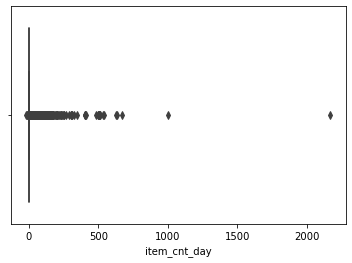

In [10]:
sns.boxplot(x= sales['item_cnt_day'])

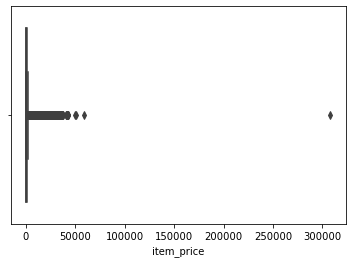

In [11]:
sns.boxplot(x= sales['item_price'])

drop the data (item_cnt_day, item_price) which is less than 0

In [12]:
sales = sales[sales['item_cnt_day'] > 0]
sales = sales[sales['item_price'] > 0]

drop the data (item_cnt_day, item_price) which is too large

In [13]:
sales = sales[sales['item_cnt_day'] < 800]
sales = sales[sales['item_price'] < 70000]

reset index

In [14]:
sales.reset_index(drop=True)
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [15]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


Since some shops have same or similiar names(shop_id = 0 with 57, 1 with 58, 10 with 11), we need to check if it is the same shop.
By checking the shop's opening time & close time and id in test data.

In [16]:
print('shops_id 0 and 57')
print(f'Shop_id 0  : Date = {sales[sales.shop_id == 0].date.min()} - {sales[sales.shop_id == 0].date.max()}')
print(f'Shop_id 57 : Date = {sales[sales.shop_id == 57].date.min()} - {sales[sales.shop_id == 57].date.max()}')

print('shops_id 1 and 58')
print(f'Shop_id 1  : Date = {sales[sales.shop_id == 1].date.min()} - {sales[sales.shop_id == 1].date.max()}')
print(f'Shop_id 58 : Date = {sales[sales.shop_id == 58].date.min()} - {sales[sales.shop_id == 58].date.max()}')

print('shops_id 10 and 11')
print(f'Shop_id 10  : Date = {sales[sales.shop_id == 10].date.min()} - {sales[sales.shop_id == 10].date.max()}')
print(f'Shop_id 11  : Date = {sales[sales.shop_id == 11].date.min()} - {sales[sales.shop_id == 11].date.max()}')

shops_id 0 and 57
Shop_id 0  : Date = 01.02.2013 - 31.01.2013
Shop_id 57 : Date = 01.02.2014 - 31.12.2014
shops_id 1 and 58
Shop_id 1  : Date = 01.02.2013 - 31.01.2013
Shop_id 58 : Date = 01.02.2014 - 31.12.2014
shops_id 10 and 11
Shop_id 10  : Date = 01.02.2013 - 31.12.2014
Shop_id 11  : Date = 01.02.2015 - 28.02.2015


In [17]:
train_set = sales.shop_id.unique()
test_set = test.shop_id.unique()
print(f'shop_id which only exists in one of the data ( train or test )\n{set(train_set) - set(test_set)}')

shop_id which only exists in one of the data ( train or test )
{0, 1, 32, 33, 8, 9, 40, 11, 43, 13, 17, 51, 20, 54, 23, 27, 29, 30}


In here, although the open & close time shows the shops are different, shop_id of 0, 1, 11 are not train or test data. This means shop is the same, the merge is needed.

In [18]:
# merge 0 with 57
sales.loc[sales.shop_id == 0, 'shop_id'] = 57

# 1 with 58
sales.loc[sales.shop_id == 1, 'shop_id'] = 58

# 10 with 11
sales.loc[sales.shop_id == 11, 'shop_id'] = 10

After merging the shop id, the anaysis of shop name is needed.

In [19]:
shops['shop_name']

0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

In here, after using *'Google translate'*, the output shows the first part of shop_name is city name and the second part of shop_name is the kind of shop(shopping mall, store, etc.).
BTW, as the output shows, the "46 Сергиев Посад ТЦ "7Я"" needs change to '46 СергиевПосад ТЦ "7Я".

In [20]:
# change "46 Сергиев Посад ТЦ "7Я"" to '46 СергиевПосад ТЦ "7Я"
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'

In [21]:
# collect the city name and the kind of shop
shops['shop_city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops['shop_kind'] = shops['shop_name'].str.split(' ').map(lambda x: x[1])
shops.head()

,shop_name,shop_id,shop_city,shop_kind
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


Using LabelEncoder

In [22]:
# label encoder for shops

shops['shop_city']  = LabelEncoder().fit_transform(shops['shop_city'] )
shops['shop_kind'] = LabelEncoder().fit_transform(shops['shop_kind'])
shops.head()

,shop_name,shop_id,shop_city,shop_kind
0,"!Якутск Орджоникидзе, 56 фран",0,0,4
1,"!Якутск ТЦ ""Центральный"" фран",1,0,8
2,"Адыгея ТЦ ""Мега""",2,1,8
3,"Балашиха ТРК ""Октябрь-Киномир""",3,2,6
4,"Волжский ТЦ ""Волга Молл""",4,3,8


In [23]:
shops = shops[['shop_id','shop_city','shop_kind']]
shops.head()

,shop_id,shop_city,shop_kind
0,0,0,4
1,1,0,8
2,2,1,8
3,3,2,6
4,4,3,8


Also, the check for items is needed.

In [24]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [25]:
items_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


Merging these two dataframe at frist

In [26]:
items = pd.merge(items, items_categories, on='item_category_id')
items

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания


classify the category of items and label encode it

In [27]:
def check_item_category(x):
    if x in range(0,8):
        return 'accessories'
    if x in range(10,18):
        return 'consoles'
    if x in range(18,32):
        return 'games'
    if x in range(32,37):
        return 'payment_cards'
    if x in range(37,42):
        return 'cinema'
    if x in range(42,55):
        return 'books'
    if x in range(55,61):
        return 'music'
    if x in range(61,73):
        return 'gifts'
    if x in range(73,79):
        return 'programs'
    if x in range(8,81):
        return 'tickets'
    if x == 83:
        return 'batteries'
    if x == 9:
        return 'delivery'
    if x == 79:
        return 'office'
    if x in range(81,83):
        return 'discs'

items['item_category_name'] = items['item_category_id'].apply(lambda x: check_item_category(x))
items

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,cinema
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,cinema
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,cinema
3,***КОРОБКА (СТЕКЛО) D,4,40,cinema
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,cinema
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,batteries
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,batteries
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,batteries
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,batteries


In [28]:
items['item_category_name'] = LabelEncoder().fit_transform(items['item_category_name'])
items.head(10)

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,3
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,3
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,3
3,***КОРОБКА (СТЕКЛО) D,4,40,3
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,3
5,***УДАР ПО ВОРОТАМ (UNI) D,6,40,3
6,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40,3
7,***ЧАЙ С МУССОЛИНИ D,8,40,3
8,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40,3
9,*ЗА ГРАНЬЮ СМЕРТИ D,10,40,3


In [29]:
items = items[['item_id', 'item_category_id', 'item_category_name']]
items

,item_id,item_category_id,item_category_name
0,0,40,3
1,2,40,3
2,3,40,3
3,4,40,3
4,5,40,3
...,...,...,...
22165,22095,83,1
22166,22096,83,1
22167,22097,83,1
22168,22098,83,1


Finally, check time

In [30]:
total_df = []
for i in range(34):
    df = sales[sales.date_block_num==i]
    total_df.append(np.array(list(product([i], df.shop_id.unique(), df.item_id.unique())), dtype='int16'))
    
total_df = pd.DataFrame(np.vstack(total_df), columns=['date_block_num','shop_id','item_id'])
total_df.sort_values(['date_block_num','shop_id','item_id'],inplace=True)
total_df

,date_block_num,shop_id,item_id
114838,0,2,19
117076,0,2,27
120551,0,2,28
118242,0,2,29
114531,0,2,32
...,...,...,...
10739546,33,59,22162
10739736,33,59,22163
10740402,33,59,22164
10741928,33,59,22166


deal with test data

In [31]:
test = test[['shop_id','item_id']]
test['date_block_num'] = 34
test

,shop_id,item_id,date_block_num
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34
214198,45,19648,34


Merge the data

In [32]:
total_df = pd.concat([total_df, test], ignore_index=True, keys=['date_block_num','shop_id','item_id'])
total_df = pd.merge(total_df, shops, on=['shop_id'], how='left')
total_df = pd.merge(total_df, items, on=['item_id'], how='left')
total_df.fillna(0, inplace=True)
total_df

,date_block_num,shop_id,item_id,shop_city,shop_kind,item_category_id,item_category_name
0,0,2,19,1,8,40,3
1,0,2,27,1,8,19,6
2,0,2,28,1,8,30,6
3,0,2,29,1,8,23,6
4,0,2,32,1,8,40,3
...,...,...,...,...,...,...,...
11098703,34,45,18454,21,8,55,8
11098704,34,45,16188,21,8,64,7
11098705,34,45,15757,21,8,55,8
11098706,34,45,19648,21,8,40,3


In [33]:
total_df = total_df.astype('int16')

# Create Lag Features and Mean-Encodings
+ item_cnt_month
+ Monthly - item_cnt_month
+ Monthly item - item_cnt_month
+ Monthly shops - item_cnt_month
+ Monthly item_category - item_cnt_month
+ Monthly shops item_category - item_cnt_month
+ Monthly shops item - item_cnt_month
+ Monthly shops subs_item category - item_cnt_month
+ Monthly shops_city - item_cnt_month

In [34]:
temp = sales.groupby(by=['shop_id','item_id','date_block_num']).agg(item_monthly=('item_cnt_day',sum))
temp.columns = ['item_monthly']
temp.reset_index(inplace=True)
total_df = pd.merge(total_df, temp, on=['date_block_num','shop_id','item_id'], how='left')
total_df['item_monthly'] = total_df['item_monthly'].fillna(0).clip(0,20).astype('float32')

In [35]:
# Define functions
def feature_helper(df, lags, cols):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            tmp = tmp.copy()
            tmp.columns = ["date_block_num", "shop_id", "item_id", col + "_mean_"+str(i)]
            tmp.date_block_num = tmp.date_block_num + i
            df = pd.merge(df, tmp, on=['date_block_num','shop_id','item_id'], how='left')
    return df

def monthly_helper(groupby_column, column_name, lags):
    global total_df
    print(groupby_column)
    print(column_name)
    print(lags)
    temp_data = total_df.groupby(groupby_column).agg({'item_monthly': ['mean']})
    temp_data.columns = column_name
    temp_data.reset_index(inplace=True)
    total_df = pd.merge(total_df, temp_data, on=groupby_column, how='left')
    total_df = feature_helper(total_df, lags, column_name)
    total_df.drop(column_name, axis=1, inplace= True)

In [36]:
ts = time()

# item_cnt_month

total_df = feature_helper(total_df, [1, 2, 3], ['item_monthly'])

params = [
# Monthly - item_cnt_month
    (['date_block_num'], ['month_mean'], [1, 2, 3]),

# Monthly item - item_cnt_month
    (['date_block_num', 'item_id'], ['item_month_mean'], [1, 2, 3]),

# Monthly shops - item_cnt_month
    (['date_block_num', 'shop_id'], ['shop_month_mean'], [1, 2, 3]),

# Monthly item_category - item_cnt_month
    (['date_block_num', 'item_category_id'], ['item_category_month_mean'], [1,2]),

# Monthly shops item_category - item_cnt_month
    (['date_block_num', 'shop_id', 'item_category_id'], ['shops_item_category_id_month_mean'], [1,2]),

# Monthly shops item - item_cnt_month
     (['date_block_num', 'shop_id', 'item_id'], ['shops_item_month_mean'], [1,2]),

# Monthly shops subs_item category - item_cnt_month
    (['date_block_num', 'shop_id', 'item_category_name'], ['shops_item_category_month_mean'], [1,2]),

# Monthly shops_city - item_cnt_month
    (['date_block_num', 'shop_city'], ['shops_city_month_mean'], [1,2])
]

for param1, param2, param3 in params:
    monthly_helper(param1, param2, param3)

total_df

print('Use time:', time() - ts)

item_monthly
['date_block_num']
['month_mean']
[1, 2, 3]
month_mean
['date_block_num', 'item_id']
['item_month_mean']
[1, 2, 3]
item_month_mean
['date_block_num', 'shop_id']
['shop_month_mean']
[1, 2, 3]
shop_month_mean
['date_block_num', 'item_category_id']
['item_category_month_mean']
[1, 2]
item_category_month_mean
['date_block_num', 'shop_id', 'item_category_id']
['shops_item_category_id_month_mean']
[1, 2]
shops_item_category_id_month_mean
['date_block_num', 'shop_id', 'item_id']
['shops_item_month_mean']
[1, 2]
shops_item_month_mean
['date_block_num', 'shop_id', 'item_category_name']
['shops_item_category_month_mean']
[1, 2]
shops_item_category_month_mean
['date_block_num', 'shop_city']
['shops_city_month_mean']
[1, 2]
shops_city_month_mean
Use time: 194.63148379325867


In [37]:
total_df

,date_block_num,shop_id,item_id,shop_city,shop_kind,item_category_id,item_category_name,item_monthly,item_monthly_mean_1,item_monthly_mean_2,...,item_category_month_mean_mean_1,item_category_month_mean_mean_2,shops_item_category_id_month_mean_mean_1,shops_item_category_id_month_mean_mean_2,shops_item_month_mean_mean_1,shops_item_month_mean_mean_2,shops_item_category_month_mean_mean_1,shops_item_category_month_mean_mean_2,shops_city_month_mean_mean_1,shops_city_month_mean_mean_2
0,0,2,19,1,8,40,3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,27,1,8,19,6,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,28,1,8,30,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,29,1,8,23,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2,32,1,8,40,3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098703,34,45,18454,21,8,55,8,0.0,1.0,0.0,...,0.197218,0.217424,0.126866,0.106061,1.0,0.0,0.089269,0.071146,0.135465,0.145348
11098704,34,45,16188,21,8,64,7,0.0,0.0,NaN,...,0.156586,NaN,0.094488,NaN,0.0,NaN,0.106293,NaN,0.135465,NaN
11098705,34,45,15757,21,8,55,8,0.0,0.0,0.0,...,0.197218,0.217424,0.126866,0.106061,0.0,0.0,0.089269,0.071146,0.135465,0.145348
11098706,34,45,19648,21,8,40,3,0.0,0.0,0.0,...,0.221072,0.242640,0.083756,0.111645,0.0,0.0,0.097021,0.111034,0.135465,0.145348


In [38]:
def scope(x):
    if x in range(0,12):
        return '13'
    if x in range(12,25):
        return '14'
    if x in range(25,35):
        return '15'

In [39]:
# days, month, and year features

total_df['month'] = total_df['date_block_num'] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
total_df['days'] = total_df['month'].map(days)
total_df['years'] = total_df['date_block_num'].map(lambda x: scope(x))

total_df['month'] = total_df['month'] + 1  # fix month

# change type column to reduce memory use

total_df['days'] = total_df['days'].astype('int16')
total_df['month'] = total_df['month'].astype('int16')
total_df['years'] = total_df['years'].astype('int16')
total_df

,date_block_num,shop_id,item_id,shop_city,shop_kind,item_category_id,item_category_name,item_monthly,item_monthly_mean_1,item_monthly_mean_2,...,shops_item_category_id_month_mean_mean_2,shops_item_month_mean_mean_1,shops_item_month_mean_mean_2,shops_item_category_month_mean_mean_1,shops_item_category_month_mean_mean_2,shops_city_month_mean_mean_1,shops_city_month_mean_mean_2,month,days,years
0,0,2,19,1,8,40,3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,13
1,0,2,27,1,8,19,6,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,13
2,0,2,28,1,8,30,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,13
3,0,2,29,1,8,23,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,13
4,0,2,32,1,8,40,3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098703,34,45,18454,21,8,55,8,0.0,1.0,0.0,...,0.106061,1.0,0.0,0.089269,0.071146,0.135465,0.145348,11,30,15
11098704,34,45,16188,21,8,64,7,0.0,0.0,NaN,...,NaN,0.0,NaN,0.106293,NaN,0.135465,NaN,11,30,15
11098705,34,45,15757,21,8,55,8,0.0,0.0,0.0,...,0.106061,0.0,0.0,0.089269,0.071146,0.135465,0.145348,11,30,15
11098706,34,45,19648,21,8,40,3,0.0,0.0,0.0,...,0.111645,0.0,0.0,0.097021,0.111034,0.135465,0.145348,11,30,15


In [40]:
# The first month when one item is on sale

total_df['item_shop_first_sale'] = \
total_df['date_block_num'] - total_df.groupby(['item_id','shop_id'])['date_block_num'].transform('min')

total_df['item_first_sale'] = \
total_df['date_block_num'] - total_df.groupby('item_id')['date_block_num'].transform('min')
total_df

,date_block_num,shop_id,item_id,shop_city,shop_kind,item_category_id,item_category_name,item_monthly,item_monthly_mean_1,item_monthly_mean_2,...,shops_item_month_mean_mean_2,shops_item_category_month_mean_mean_1,shops_item_category_month_mean_mean_2,shops_city_month_mean_mean_1,shops_city_month_mean_mean_2,month,days,years,item_shop_first_sale,item_first_sale
0,0,2,19,1,8,40,3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,31,13,0,0
1,0,2,27,1,8,19,6,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,31,13,0,0
2,0,2,28,1,8,30,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,31,13,0,0
3,0,2,29,1,8,23,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,31,13,0,0
4,0,2,32,1,8,40,3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,31,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098703,34,45,18454,21,8,55,8,0.0,1.0,0.0,...,0.0,0.089269,0.071146,0.135465,0.145348,11,30,15,11,11
11098704,34,45,16188,21,8,64,7,0.0,0.0,NaN,...,NaN,0.106293,NaN,0.135465,NaN,11,30,15,2,2
11098705,34,45,15757,21,8,55,8,0.0,0.0,0.0,...,0.0,0.089269,0.071146,0.135465,0.145348,11,30,15,34,34
11098706,34,45,19648,21,8,40,3,0.0,0.0,0.0,...,0.0,0.097021,0.111034,0.135465,0.145348,11,30,15,11,11


In [41]:
total_df = total_df[total_df["date_block_num"] > 3]

In [42]:
# check null data 
total_df.isnull()

,date_block_num,shop_id,item_id,shop_city,shop_kind,item_category_id,item_category_name,item_monthly,item_monthly_mean_1,item_monthly_mean_2,...,shops_item_month_mean_mean_2,shops_item_category_month_mean_mean_1,shops_item_category_month_mean_mean_2,shops_city_month_mean_mean_1,shops_city_month_mean_mean_2,month,days,years,item_shop_first_sale,item_first_sale
1488686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488688,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,False,False,False,False,False
1488689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11098704,False,False,False,False,False,False,False,False,False,True,...,True,False,True,False,True,False,False,False,False,False
11098705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11098706,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
total_df = total_df.fillna(0)
total_df.isnull()

,date_block_num,shop_id,item_id,shop_city,shop_kind,item_category_id,item_category_name,item_monthly,item_monthly_mean_1,item_monthly_mean_2,...,shops_item_month_mean_mean_2,shops_item_category_month_mean_mean_1,shops_item_category_month_mean_mean_2,shops_city_month_mean_mean_1,shops_city_month_mean_mean_2,month,days,years,item_shop_first_sale,item_first_sale
1488686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11098703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11098704,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11098705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11098706,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9610022 entries, 1488686 to 11098707
Data columns (total 35 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   date_block_num                            int16  
 1   shop_id                                   int16  
 2   item_id                                   int16  
 3   shop_city                                 int16  
 4   shop_kind                                 int16  
 5   item_category_id                          int16  
 6   item_category_name                        int16  
 7   item_monthly                              float32
 8   item_monthly_mean_1                       float32
 9   item_monthly_mean_2                       float32
 10  item_monthly_mean_3                       float32
 11  month_mean_mean_1                         float32
 12  month_mean_mean_2                         float32
 13  month_mean_mean_3                         float32


In [45]:
total_df.to_pickle('data.pkl')